### Importação das bibliotecas iniciais
Para iniciar o trabalho, são importadas bibliotecas úteis no decorrer do algoritmo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Importação e tratamento inicial do dataset
Iniciamos fazendo a importação dos dados a serem trabalhados e realizando o primeiro tratamento, focado em converter variáveis categórias em numéricas.

In [ ]:
colunas = ['sex', 'age', 'address', 'Pstatus','Medu','Fedu','famsize',
           'traveltime', 'studytime','failures','schoolsup', 'famsup',
           'activities','paid','internet','higher','romantic','freetime','goout',
           'health', 'absences', 'G1', 'G2', 'G3']
notas_mat = pd.read_excel("student-mat.xlsx", usecols = colunas)
pd.set_option('display.max_columns', None)

Agora convertemos para numéricas as variáveis categóricas.

In [ ]:
label_sex = {'F': 0,
              'M': 1,
              }
notas_mat['sex'] = notas_mat['sex'].map(label_sex)

label_address = {'U' : 0,
                 'R' : 1,
                }

notas_mat['address'] = notas_mat['address'].map(label_address)

label_fam = {'GT3' : 0,
             'LE3' : 1,
}

notas_mat['famsize'] = notas_mat['famsize'].map(label_fam)

label_pstatus = {'T' : 0,
                 'A' : 1,
}

notas_mat['Pstatus'] = notas_mat['Pstatus'].map(label_pstatus)

label_various = {'no' : 0,
                 'yes' : 1,
                 }

colunas_2 = ['schoolsup','famsup','paid','activities','higher','internet','romantic']
for coluna in colunas_2:
  notas_mat[coluna] = notas_mat[coluna].map(label_various)

In [ ]:
notas_mat.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
0,0,18,0,0,1,4,4,2,2,0,1,0,0,0,1,0,0,3,4,3,6,5,6,6
1,0,17,0,0,0,1,1,1,2,0,0,1,0,0,1,1,0,3,3,3,4,5,5,6
2,0,15,0,1,0,1,1,1,2,3,1,0,1,0,1,1,0,3,2,3,10,7,8,10
3,0,15,0,0,0,4,2,1,3,0,0,1,1,1,1,1,1,2,2,5,2,15,14,15
4,0,16,0,0,0,3,3,1,2,0,0,1,1,0,1,0,0,3,2,5,4,6,10,10


###Tratamento dos dados
É verificada a presença de outliers e feito seu tratamento. Além disso, vemos quais são as variáveis mais correlacionadas à variável de classificação.

In [ ]:
notas_mat.describe()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.696203,0.222785,0.288608,0.103797,2.749367,2.521519,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.949367,0.832911,0.334177,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.219525,0.373528,0.472300,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,17.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,1.000000,18.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


É feito o boxplot das variáveis numéricas não binárias.

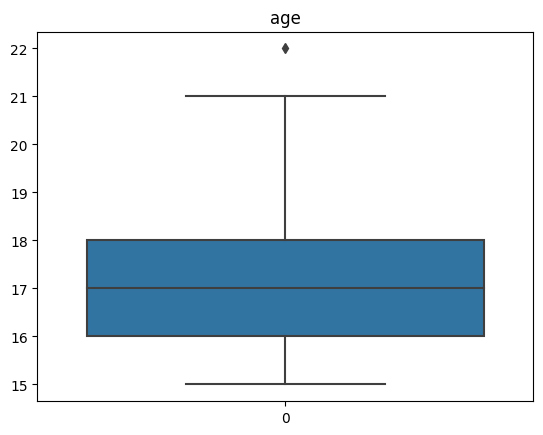

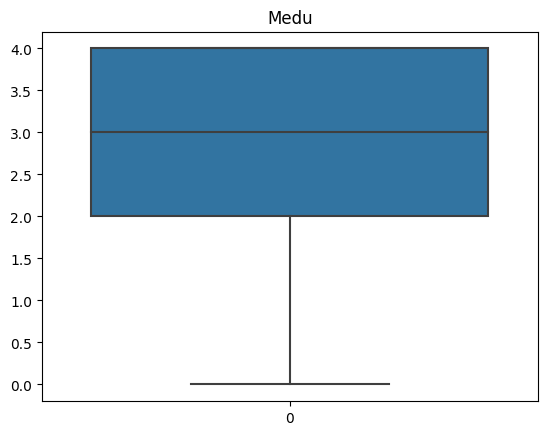

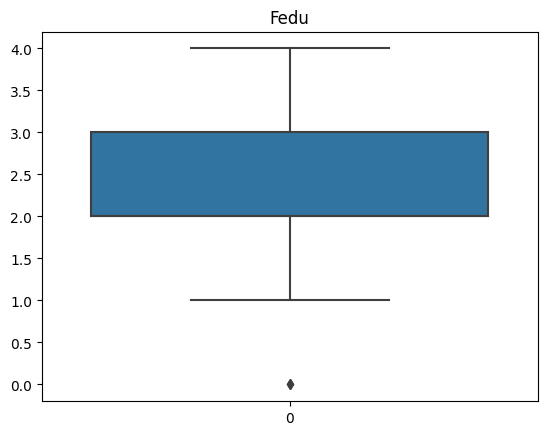

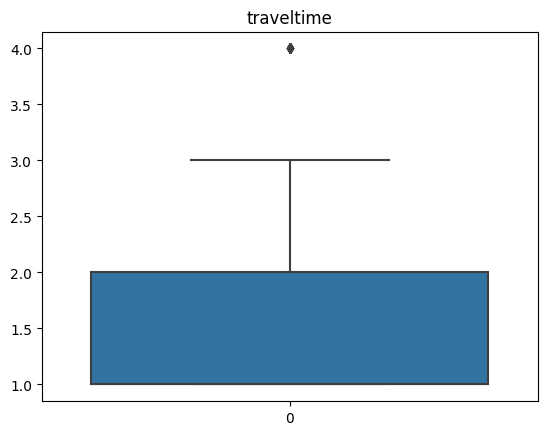

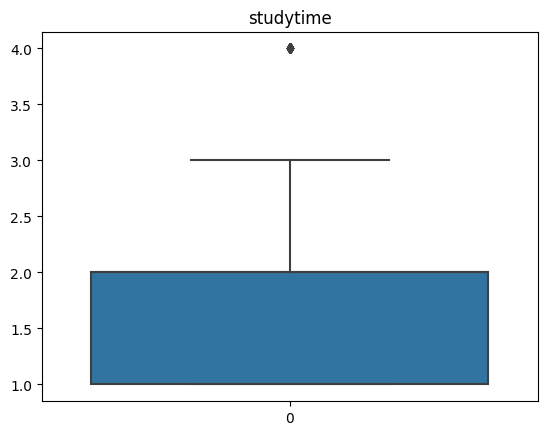

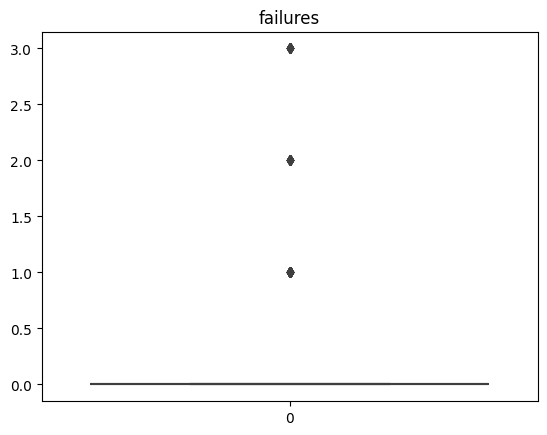

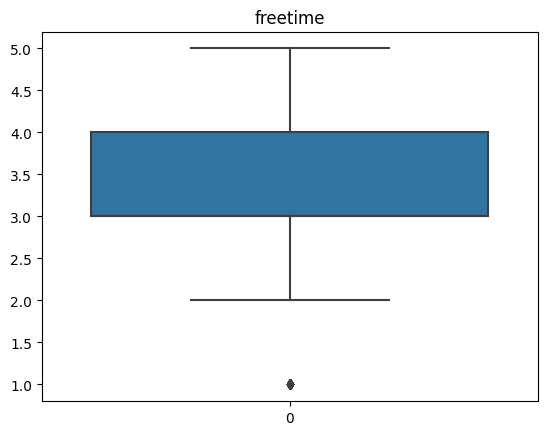

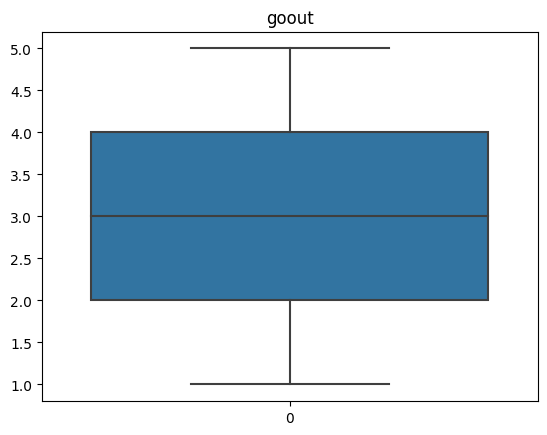

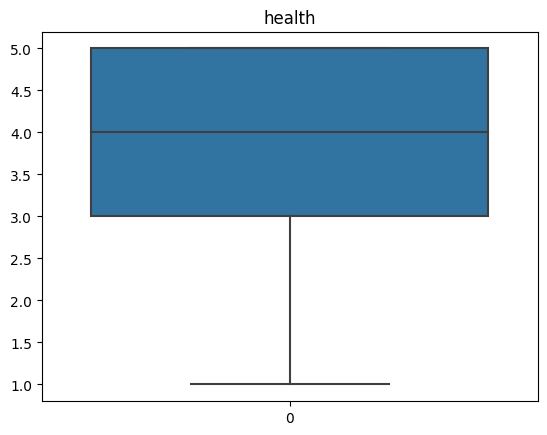

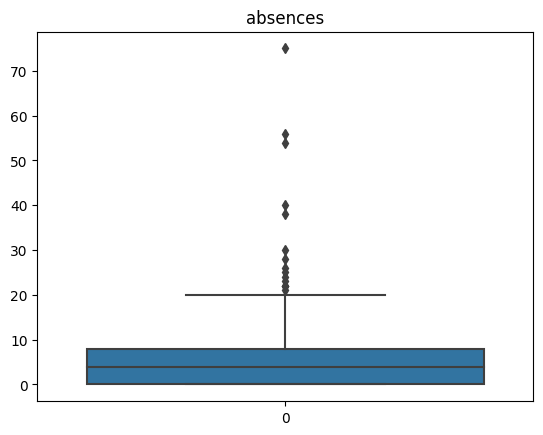

In [ ]:
colunas_mat = notas_mat[['age', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures','freetime', 'goout',
       'health', 'absences']]
for column in colunas_mat:
    sns.boxplot(data = colunas_mat[column])
    plt.title(column)
    plt.show()

Encontradas as colunas com outliers, as mesmas serão tratadas.

In [ ]:
outliers = [['age', 'Fedu','traveltime', 'studytime', 'failures',  'freetime','absences']]

# Loop pelas colunas selecionadas removendo outliers
for column in outliers:
    Q1 = notas_mat[column].quantile(0.25)
    Q3 = notas_mat[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = notas_mat[(notas_mat[column] >= lower_bound) & (notas_mat[column] <= upper_bound)]#Dataset contendo as colunas com outliers removidos


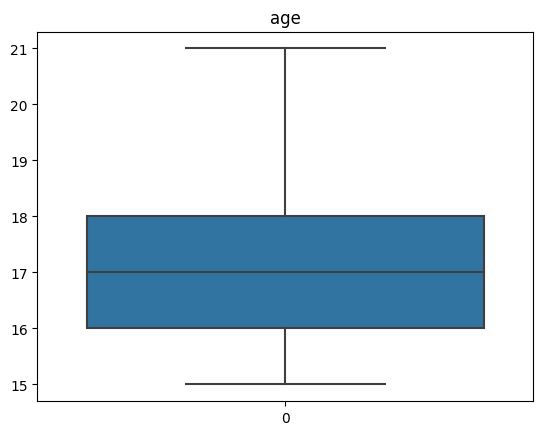

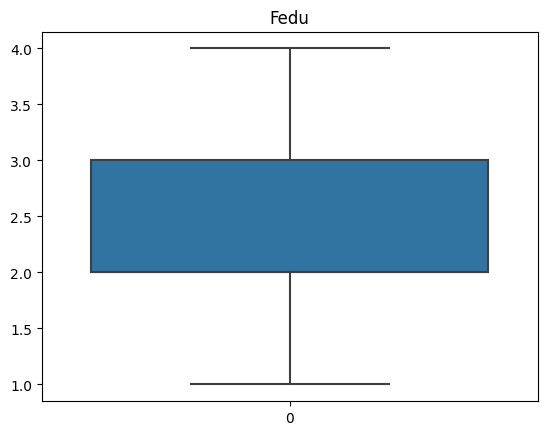

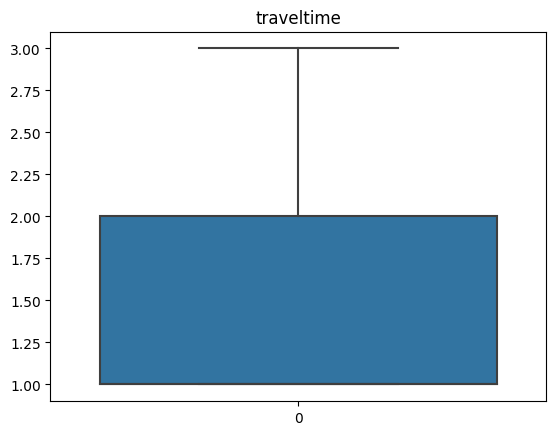

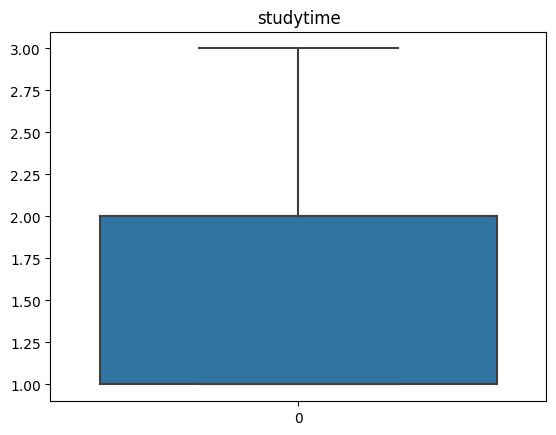

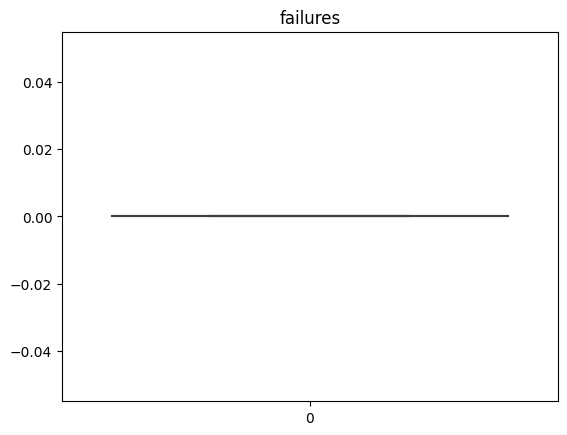

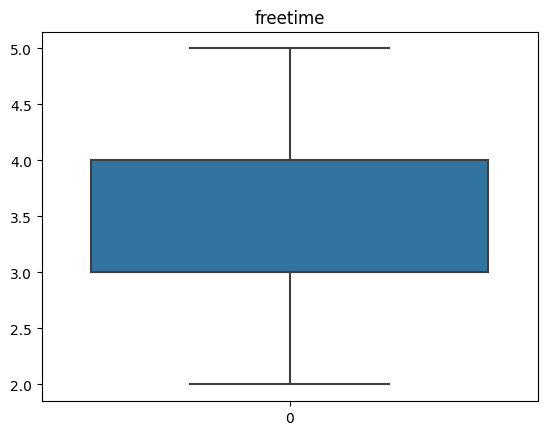

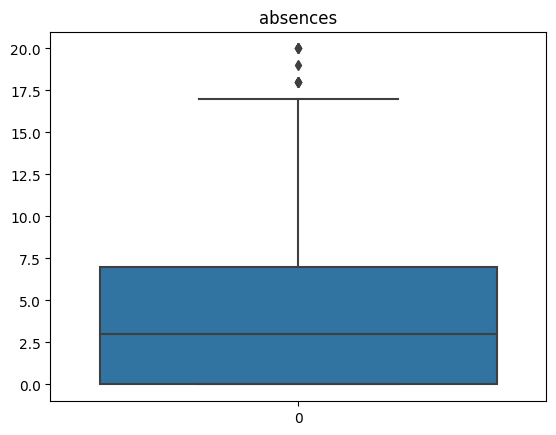

In [ ]:
colunas = df[['age', 'Fedu','traveltime', 'studytime', 'failures',  'freetime','absences']]
for column in colunas:
    sns.boxplot(data = df[column])
    plt.title(column)
    plt.show()


Em seguida, atualizamos o valor das colunas tratadas, passando do dataframe df para o dataframe notas_mat.

In [ ]:
colunas_atualizacao = ['age', 'Fedu','traveltime', 'studytime', 'failures',  'freetime','absences']
for coluna in colunas_atualizacao:
  df[coluna] = notas_mat[coluna]

Também preencheremos as colunas cujos outliers foram removidos com os valores de média de cada uma das colunas.

In [ ]:
for colunas in colunas_atualizacao:
  notas_mat[coluna] = notas_mat[coluna].fillna(notas_mat[coluna].mean())

In [ ]:
notas_mat.describe()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.696203,0.222785,0.288608,0.103797,2.749367,2.521519,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.949367,0.832911,0.334177,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.219525,0.373528,0.472300,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,17.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,1.000000,18.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Em seguida, plotamos o mapa de correlação para verificar as variáveis mais correlacionadas com G3.

<Axes: >

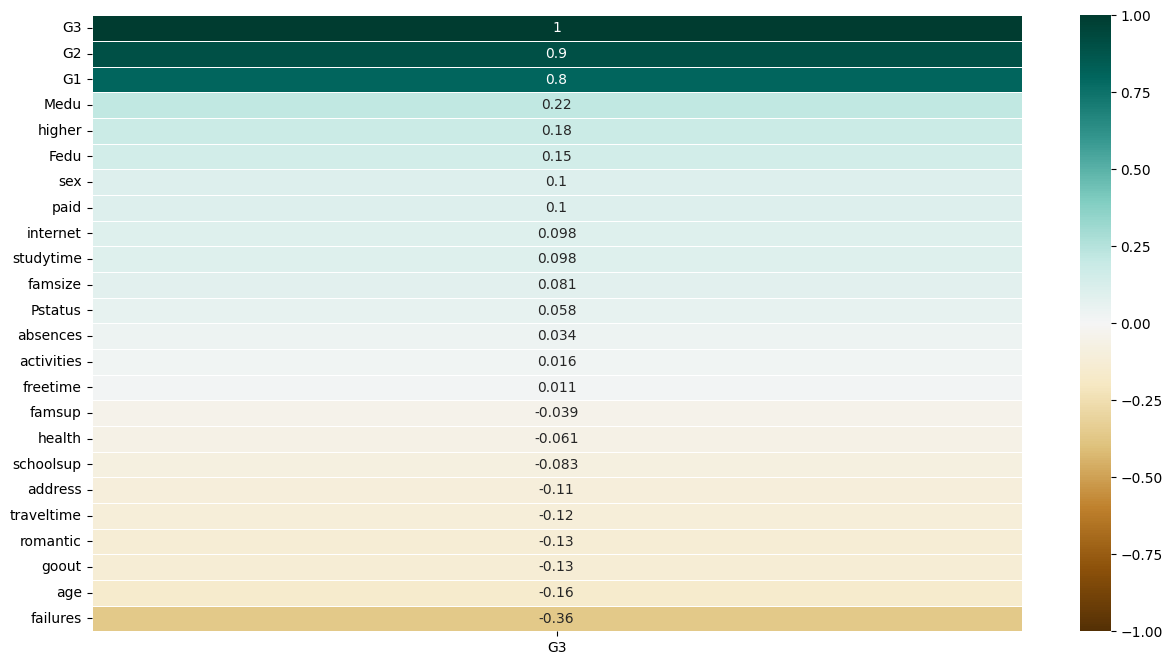

In [ ]:
plt.figure(figsize=(15,8))

sns.heatmap(notas_mat.corr()[['G3']].sort_values(by='G3', ascending=False),cmap='BrBG', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False)

Vemos que as notas G1 e G2 são as variáveis mais correlacionadas com a nota G3.

###Modelagem e predição
Faremos agora a regressão para obter os valores da nota G3 e compará-los com os valores reais.
Faremos a normalização dos dados antes da predição.

In [ ]:
notas_features = notas_mat.drop(['G3'],1)

<ipython-input-13-e16da8e874c6>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  notas_features = notas_mat.drop(['G3'],1)


Criamos na célula acima um dataframe sem a coluna G3, que são as notas que queremos prever. Agora fazemos a normalização dos dados das colunas restantes.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Aplicando o MinMaxScaler ao DataFrame
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(notas_features), columns = notas_features.columns)
notas_features = df_scaled

Partimos para a predição, verificando ao fim a acurácia e o erro médio absoluto (MAE)

In [ ]:
predict='G3'
X=np.array(notas_features)
y=np.array(notas_mat[predict])

In [ ]:
np.random.seed(1)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.35, shuffle = True)

In [ ]:
linear = LinearRegression().fit(X_train, y_train)
accuracy=linear.score(X_test,y_test)
print(accuracy)

0.7858401333996619


In [ ]:
y_pred = linear.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_pred)
print(MAE)

1.250863587232593


###Construção do dataframe de conclusão
Obtemos aproximadamente 78.6% de acurácia na predição das notas de G3 e um MAE de 1,25. Por fim, criaremos um dataframe contendo os valores reais, os previstos, a diferença entre estes e duas colunas referentes à necessidade de acompanhamento.

In [ ]:
# Criação do DataFrame
resumo = pd.DataFrame({
    'Valores reais': y_test,
    'Valores previstos': y_pred,
})

# Coluna com a diferença da nota real para a nota prevista
resumo['Diferença'] = abs(resumo['Valores reais'] - resumo['Valores previstos'])

# Adição da coluna de acompanhamento com base na nota prevista e no MAE
resumo['Acompanhamento_previsão'] = (resumo['Valores previstos'] < 10) & (resumo['Diferença'] >= 1.25)

# Substituição os valores booleanos por strings
resumo['Acompanhamento_previsão'] = resumo['Acompanhamento_previsão'].replace({True: 'Indica-se acompanhamento', False: 'Não indicado acompanhamento'})

#Adição de coluna para verificar notas reais que precisariam de acompanhamento seguindo a penas o critério de notas abaixo de 10
resumo['Acompanhamento_real'] = resumo['Valores reais'] < 10

# Substituição os valores booleanos por strings
resumo['Acompanhamento_real'] = resumo['Acompanhamento_real'].replace({True: 'Indica-se acompanhamento', False: 'Não indicado acompanhamento'})

#Exibição do dataframe
pd.set_option('display.max_rows', None)
resumo

,Valores reais,Valores previstos,Diferença,Acompanhamento_previsão,Acompanhamento_real
0,0,5.835007,5.835007,Indica-se acompanhamento,Indica-se acompanhamento
1,10,10.064117,0.064117,Não indicado acompanhamento,Não indicado acompanhamento
2,8,5.287419,2.712581,Indica-se acompanhamento,Indica-se acompanhamento
3,10,9.178423,0.821577,Não indicado acompanhamento,Não indicado acompanhamento
4,10,9.071465,0.928535,Não indicado acompanhamento,Não indicado acompanhamento
5,12,9.905572,2.094428,Indica-se acompanhamento,Não indicado acompanhamento
6,8,7.384253,0.615747,Não indicado acompanhamento,Indica-se acompanhamento
7,11,12.479922,1.479922,Não indicado acompanhamento,Não indicado acompanhamento
8,11,10.967455,0.032545,Não indicado acompanhamento,Não indicado acompanhamento
9,8,7.565254,0.434746,Não indicado acompanhamento,Indica-se acompanhamento


Vamos ver quantos dos alunos precisam de acompanhamento.

In [ ]:
len(X_test)

139

In [ ]:
resumo['Acompanhamento_previsão'].value_counts()

Não indicado acompanhamento    108
Indica-se acompanhamento        31
Name: Acompanhamento_previsão, dtype: int64

Dos 139 alunos separados para teste, o acompanhamento é indicado na previsão para 31. Vamos comparar com os valores de G3 reais.

In [ ]:
resumo['Acompanhamento_real']. value_counts()

Não indicado acompanhamento    93
Indica-se acompanhamento       46
Name: Acompanhamento_real, dtype: int64

Temos 46 indicações de acompanhamento reais, logo 15 alunos que precisam de acompanhamento não foram contemplados na previsão.
Veremos agora quantas indicações coincidem nas colunas 'Acompanhamento_previsão' e 'Acompanhamento_real'.

In [ ]:
igual = 0
diferente = 0

for i in range(len(resumo['Acompanhamento_previsão'])):
    if resumo['Acompanhamento_previsão'][i] == resumo['Acompanhamento_real'][i]:
        igual += 1
    else:
        diferente += 1

print("Valores iguais:", igual)
print("Valores diferentes:", diferente)

Valores iguais: 104
Valores diferentes: 35


A previsão e a indicação real de acompanhamento coincidem em 104 casos e diferem em 35. Sendo assim, com a lógica proposta, alcançamos uma acurácia de 74,82% na indicação de acompanhamento para os estudantes.